In [21]:
STAC_URL = "https://stac.marine.copernicus.eu/metadata/catalog.stac.json"

import pystac

catalog = pystac.Catalog.from_file(STAC_URL)
desired_id = 'INSITU_GLO_PHY_TS_OA_NRT_013_002'
childs = catalog.get_child_links()
# Find the child link with the specific ID
child_link = next((child for child in childs if child.title == desired_id), None)

In [22]:
child_collection = pystac.Collection.from_file(child_link)

In [23]:
child_collection

<Collection id=INSITU_GLO_PHY_TS_OA_NRT_013_002>

In [24]:
#child_collection = pystac.Collection.from_file(child_link)
item = child_collection.get_item('cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M_202211')

In [25]:
item

<Item id=cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M_202211>

In [19]:
import xarray as xr

selected_asset = item.assets['geoChunked'].href
ds = xr.open_zarr(selected_asset)


In [20]:
ds

<xarray.Dataset>
Dimensions:      (time: 23, elevation: 187, latitude: 1671, longitude: 720)
Coordinates:
  * elevation    (elevation) float32 -5.5e+03 -5.4e+03 -5.3e+03 ... -3.0 -1.0
  * latitude     (latitude) float64 -77.0 -76.9 -76.8 -76.7 ... 89.8 89.9 90.0
  * longitude    (longitude) float64 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * time         (time) datetime64[ns] 2023-01-01 2023-02-01 ... 2024-11-01
Data variables:
    PSAL         (time, elevation, latitude, longitude) float32 dask.array<chunksize=(4, 8, 128, 256), meta=np.ndarray>
    PSAL_ERR     (time, elevation, latitude, longitude) float32 dask.array<chunksize=(4, 8, 128, 256), meta=np.ndarray>
    PSAL_PCTVAR  (time, elevation, latitude, longitude) float32 dask.array<chunksize=(4, 8, 128, 256), meta=np.ndarray>
    TEMP         (time, elevation, latitude, longitude) float32 dask.array<chunksize=(4, 8, 128, 256), meta=np.ndarray>
    TEMP_ERR     (time, elevation, latitude, longitude) float32 dask.array<chunksize=(4, 8, 128, 256), meta=np.ndarray>
    TEMP_PCTVAR  (time, elevation, latitude, longitude) float32 dask.array<chunksize=(4, 8, 128, 256), meta=np.ndarray>
Attributes: (12/21)
    Conventions:            CF-1.6
    analysis_name:          OA_NRTOAGL01
    comment:                V8.0 reference climatology and analysis parameters
    creation_date:          20241125T032529
    data_manager:           Thierry.Carval@ifremer.fr
    easternmost_longitude:  179.5
    ...                     ...
    source:                 ISAS-V8
    southernmost_latitude:  -77.0105
    start_date:             2024-10-15
    stop_date:              2024-10-15
    title:                  Global Ocean - Coriolis Analysis - Near Real Time
    westernmost_longitude:  -180

In [ ]:
# Subset the dataset
subset = ds.sel(
    latitude=slice(46, 49),  # Xarray uses descending order for slices
    longitude=slice(-10, -4),
    time=slice("2024-11-01T00:00:00", "2024-11-02T00:00:00")
)

# Select the variable
temp = subset["TEMP"]

In [5]:
temp

<xarray.DataArray 'TEMP' (time: 1, elevation: 152, latitude: 30, longitude: 13)>
dask.array<getitem, shape=(1, 152, 30, 13), dtype=float32, chunksize=(1, 4, 30, 13), chunktype=numpy.ndarray>
Coordinates:
  * elevation  (elevation) float32 -2e+03 -1.98e+03 -1.96e+03 ... -5.0 -3.0 -1.0
  * latitude   (latitude) float64 46.1 46.2 46.3 46.4 ... 48.7 48.8 48.9 49.0
  * longitude  (longitude) float64 -10.0 -9.5 -9.0 -8.5 ... -5.5 -5.0 -4.5 -4.0
  * time       (time) datetime64[ns] 2024-11-01
Attributes:
    long_name:      Temperature 
    regrid_method:  bilinear
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    valid_max:      20000
    valid_min:      -23000

In [6]:
temp_l = temp.isel(elevation = 151)

In [7]:
temp_l

<xarray.DataArray 'TEMP' (time: 1, latitude: 30, longitude: 13)>
dask.array<getitem, shape=(1, 30, 13), dtype=float32, chunksize=(1, 30, 13), chunktype=numpy.ndarray>
Coordinates:
    elevation  float32 -1.0
  * latitude   (latitude) float64 46.1 46.2 46.3 46.4 ... 48.7 48.8 48.9 49.0
  * longitude  (longitude) float64 -10.0 -9.5 -9.0 -8.5 ... -5.5 -5.0 -4.5 -4.0
  * time       (time) datetime64[ns] 2024-11-01
Attributes:
    long_name:      Temperature 
    regrid_method:  bilinear
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    valid_max:      20000
    valid_min:      -23000

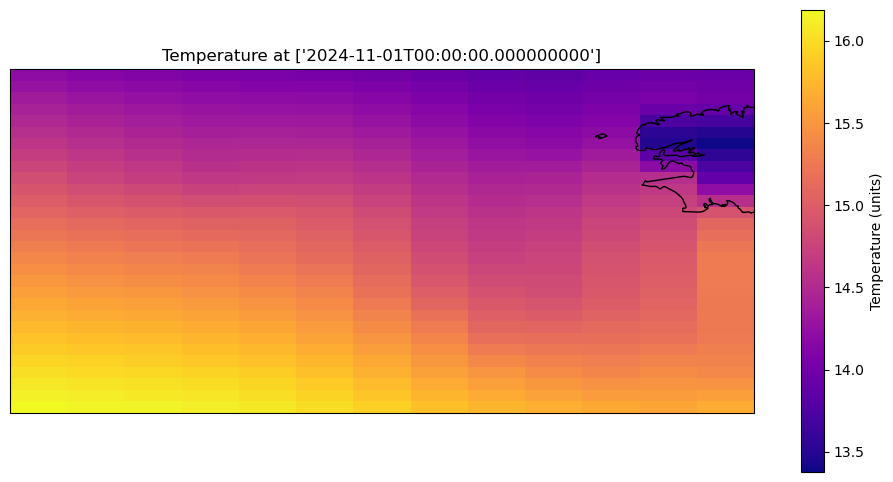

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up the plot
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 6))
# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgrey")
# Plot the 2D map
temp_l.plot(
    cmap="plasma",
    cbar_kwargs={"label": "Temperature (units)"}
)
plt.title(f"Temperature at {str(temp_l.time.values)}")
plt.show()

In [9]:
#child_collection = pystac.Collection.from_file(child_link)
item = child_collection.get_item('cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M_202411')

In [10]:
import xarray as xr

selected_asset = item.assets['geoChunked'].href
ds = xr.open_zarr(selected_asset)
# Subset the dataset
subset = ds.sel(
    latitude=slice(46, 49),  # Xarray uses descending order for slices
    longitude=slice(-10, -4),
    time=slice("2024-11-01T00:00:00", "2024-11-02T00:00:00")
)

# Select the variable
temp2 = subset["TEMP"]

In [11]:
temp_l2 = temp2.isel(elevation = 186)

In [12]:
temp_l2

<xarray.DataArray 'TEMP' (time: 1, latitude: 30, longitude: 13)>
dask.array<getitem, shape=(1, 30, 13), dtype=float32, chunksize=(1, 30, 13), chunktype=numpy.ndarray>
Coordinates:
    elevation  float32 -1.0
  * latitude   (latitude) float64 46.1 46.2 46.3 46.4 ... 48.7 48.8 48.9 49.0
  * longitude  (longitude) float64 -10.0 -9.5 -9.0 -8.5 ... -5.5 -5.0 -4.5 -4.0
  * time       (time) datetime64[ns] 2024-11-01
Attributes:
    long_name:      Temperature 
    regrid_method:  bilinear
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    valid_max:      20000
    valid_min:      -23000

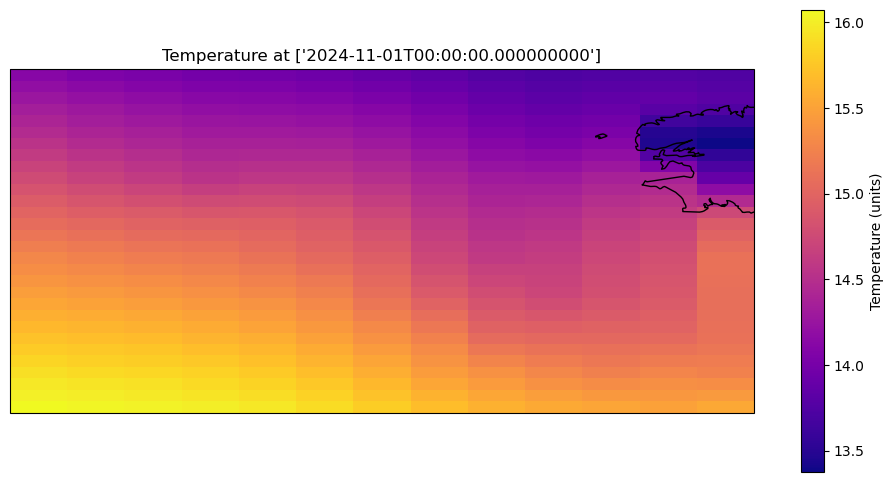

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up the plot
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 6))
# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgrey")
# Plot the 2D map
temp_l2.plot(
    cmap="plasma",
    cbar_kwargs={"label": "Temperature (units)"}
)
plt.title(f"Temperature at {str(temp_l2.time.values)}")
plt.show()

In [14]:
import copernicusmarine as cm
import json
from pprint import pprint
cm.__version__
username = 'ldrouineau'
password = 'Mozart78!'

In [15]:
cm.subset(
  dataset_id="cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M",
        username = username,
    password = password,
  dataset_version="202411",
  variables=["TEMP"],
  minimum_longitude=-10,
  maximum_longitude=-4,
  minimum_latitude=46,
  maximum_latitude=49,
  start_datetime="2024-11-01T00:00:00",
  end_datetime="2024-11-02T00:00:00",
  minimum_depth=0,
  maximum_depth=1000,
)

INFO - 2024-12-13T16:31:18Z - Cache could not be loaded. Retrying without cache. If the problem with the cache persists, try running copernicusmarine describe --overwrite-metadata-cache
Fetching catalog: 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]
INFO - 2024-12-13T16:31:27Z - You forced selection of dataset version "202411"
INFO - 2024-12-13T16:31:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-12-13T16:31:28Z - Service was not specified, the default one was selected: "arco-time-series"
WARNING - 2024-12-13T16:31:28Z - Some or all of your subset selection [2024-11-01 00:00:00, 2024-11-02 00:00:00] for the time dimension  exceed the dataset coordinates [2023-01-01 00:00:00, 2024-11-01 00:00:00]
INFO - 2024-12-13T16:31:28Z - Downloading using service arco-time-series...
INFO - 2024-12-13T16:31:28Z - <xarray.Dataset>
Dimensions:    (depth: 102, latitude: 30, longitude: 13, time: 1)
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0 10.0 15.0

  Y


INFO - 2024-12-13T16:31:31Z - Writing to local storage. Please wait...


  0%|          | 0/80 [00:00<?, ?it/s]

INFO - 2024-12-13T16:31:32Z - Successfully downloaded to cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M_TEMP_10.00W-4.00W_46.10N-49.00N_1.00-1000.00m_2024-11-01.nc


PosixPath('cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M_TEMP_10.00W-4.00W_46.10N-49.00N_1.00-1000.00m_2024-11-01.nc')

In [16]:
import xarray as xr

# Load the NetCDF file
file_path = 'your_file.nc'
ds = xr.open_dataset('cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M_TEMP_10.00W-4.00W_46.10N-49.00N_1.00-1000.00m_2024-11-01.nc')


In [17]:
data = ds['TEMP'].isel(depth=0, time=0)
lat = ds['latitude']
lon = ds['longitude']

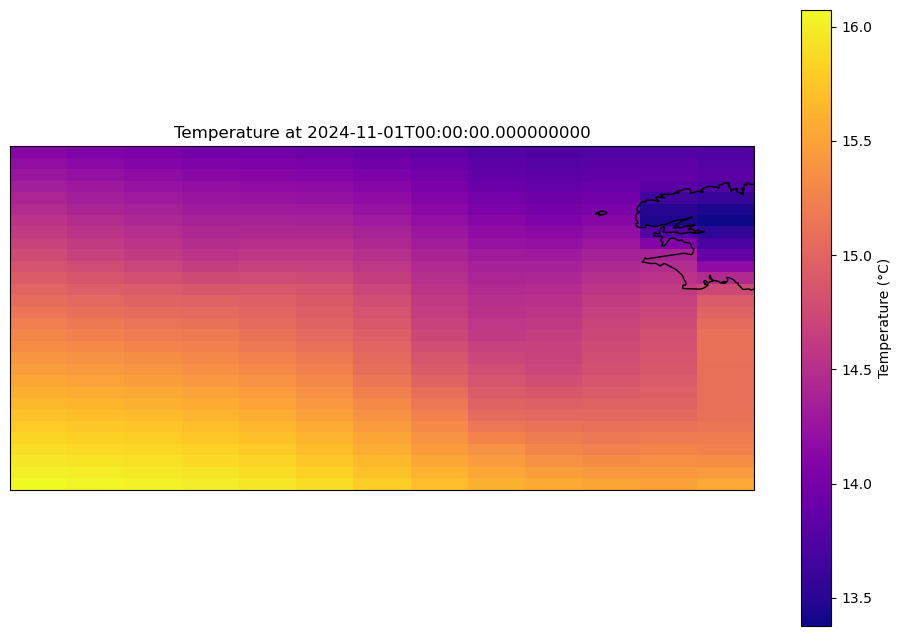

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Define the projection
projection = ccrs.PlateCarree()

# Create the plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=projection)
mesh = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='plasma', shading='auto')
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title(f'Temperature at {str(data.time.values)}')

# Add a colorbar
plt.colorbar(mesh, orientation='vertical', label=f'Temperature (°C)')
plt.show()